# Assignment 1

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

### Load your image

1. Display it in RGB

2. Convert to grayscale ( use NumPy to calculate aggregates using the weighted sum formula )

3. Use the cvtColor function to do the same and compare results

3. Print the array shapes of both the RGB and grayscale images

4. Print a few pixel values of both

( Do you notice the difference that number of channels created on the array shape ?? )

In [ ]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.

In [2]:
import base64
with open("einstein.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
    print(encoded_string.decode())

/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAHpAZADASIAAhEBAxEB/8QAGwAAAgMBAQEAAAAAAAAAAAAAAQIAAwQFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAfHgz2+KLZLK1sWVA0lVXWUBgCGAIJA4AZBSYAwDRbLESxJUVkzoCDOpIAuj2CtklkklgkiSQhEDAVkkl65J9fkDE2VpcJaBastYYypLVKlsSUMHli3jUoO6RkGwWZJbCo2Vioy50iWJnSK6SySSwgEUyUSAkkiSQkkJCKkkO5DPV5YYbIGFKtglqNjRWmlbMdeqrn0TQu2VfR9Ddx61VdrTz35/k+5Gp8zzfR+dvHiavoefU+ar6DhmWu+GddVJUtiSiSSrCIWELIQQESmSISpoSQ7ph9flhkskihNbQxDWXKy6zUW2ce1foX2eX02dJt2NWOzy1rfSortCYh0BXK857ao+Y5PqPOs+fU/QOhrPx/L7jyG84w0FBgsZZQDASSARAyQkkPQEN7fIIxsrW2RQ7xSXOsravZxuno6uj4/Vk7bXc96Lsl8tyiosSph4oLGpIarAVjQ5np6Gc8N4r6v5rWfBJ1cHXGdYtkWDOhCCSSBCFMESSRfSGH3eENGsrYuVywVDHjRdXZw79DuYOp5fRq1Z3zu+yjTEqGcssyPWuqsRe2cLrGUrrTMJdi03XKYejms+Uc/6P5Szyi9HnbwoIqSSICAgRYRCSQ9SWP0PniNKVmiLLhZU5szpulXt8frbt17fP3dqUXQ/LsTdhr4s13F42nl6

(-0.5, 399.5, 488.5, -0.5)

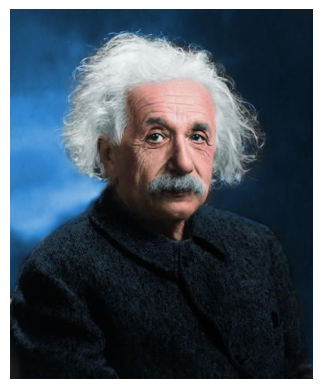

In [3]:
from PIL import Image

import io
import base64
import matplotlib.pyplot as plt
import numpy as np

img_data = base64.b64decode(encoded_string)
image = Image.open(io.BytesIO(img_data))

plt.imshow(image)
plt.axis('off')  


(489, 400, 3)
The shape of greyscale_image is: (489, 400)


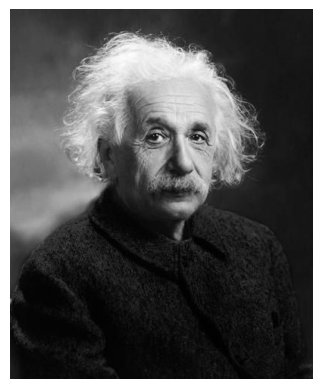

In [4]:
# Using numpy to convert to greyscale
image_array = np.array(image)
print(image_array.shape)  
# the array represents the image as red, green, blue channels

greyscale_image = np.zeros((image_array.shape[0], image_array.shape[1]), dtype=np.float32)

for i in range(image_array.shape[0]):
    for j in range(image_array.shape[1]):
        r, g, b = image_array[i, j]
        greyscale_image[i, j] = 0.299 * r + 0.587 * g + 0.114 * b

plt.imshow(greyscale_image, cmap='gray')
plt.axis('off')

print("The shape of greyscale_image is:", greyscale_image.shape)


The shape of greyscale_image_cv is: (489, 400)


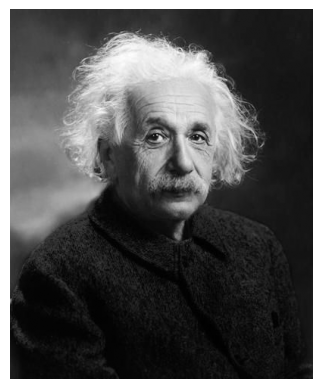

In [5]:
# Now using OpenCV to convert to greyscale
import cv2

greyscale_image_cv = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
plt.imshow(greyscale_image_cv, cmap='gray')
plt.axis('off')

print("The shape of greyscale_image_cv is:", greyscale_image_cv.shape)

Average pixel value using numpy method: 62.01388
Average pixel value using OpenCV method: 62.01698875255624
Maximum difference between the two methods: 0.49899995
Mean difference between the two methods: 0.15868913
We can see that the two methods give very similar results as the differences are very small as compared to the pixel values


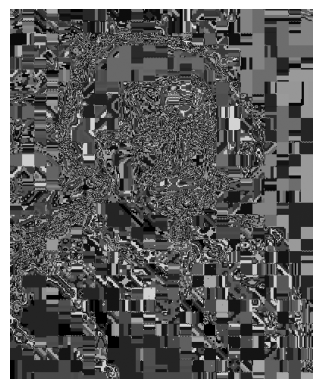

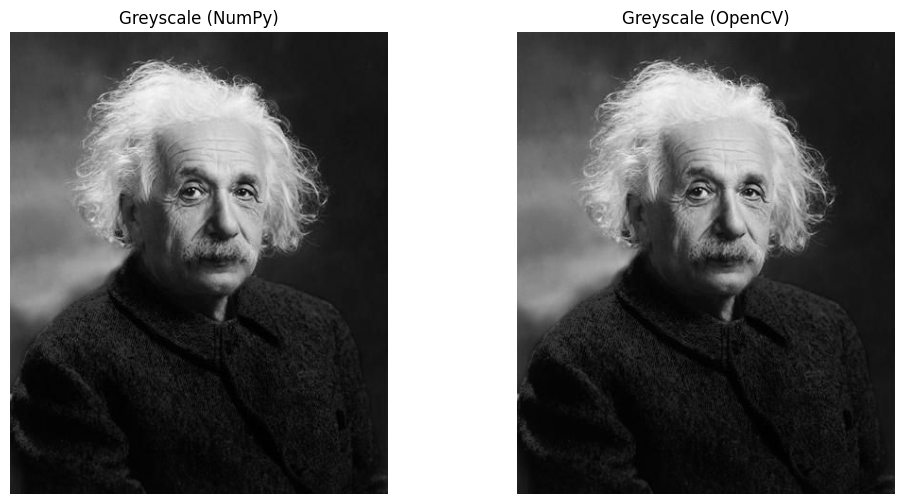

In [6]:
#comparing both methods
difference = np.abs(greyscale_image - greyscale_image_cv)

print ("Average pixel value using numpy method:", np.mean(greyscale_image))
print ("Average pixel value using OpenCV method:", np.mean(greyscale_image_cv))

print("Maximum difference between the two methods:", np.max(difference))
print("Mean difference between the two methods:", np.mean(difference))

print("We can see that the two methods give very similar results as the differences are very small as compared to the pixel values")

plt.imshow(difference, cmap='gray')
plt.axis('off')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(greyscale_image, cmap='gray', vmin=0, vmax=255)
plt.title('Greyscale (NumPy)')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(greyscale_image_cv, cmap='gray', vmin=0, vmax=255)
plt.title('Greyscale (OpenCV)')
plt.axis('off')

plt.show()

In [7]:
# Printing few pixel values for comparison

print("Pixel values at (0,0): NumPy =", greyscale_image[0,0], ", OpenCV =", greyscale_image_cv[0,0])
print("Pixel values at (100,100): NumPy =", greyscale_image[100,100], ", OpenCV =", greyscale_image_cv[100,100])  
print("Pixel values at (200,200): NumPy =", greyscale_image[200,200], ", OpenCV =", greyscale_image_cv[200,200])
print("Pixel values at (300,300): NumPy =", greyscale_image[300,300], ", OpenCV =", greyscale_image_cv[300,300])


Pixel values at (0,0): NumPy = 56.136 , OpenCV = 56
Pixel values at (100,100): NumPy = 115.939 , OpenCV = 116
Pixel values at (200,200): NumPy = 163.262 , OpenCV = 163
Pixel values at (300,300): NumPy = 34.862 , OpenCV = 35


## Part B
### B1. Compute the FFT of the grayscale image ( use NumPy )
Steps:
1. <code>np.fft.fft2</code>
2. <code>np.fft.fftshift</code>
3. Store as <code>fshift</code>

### B2. Compute magnitude, phase and display Magnitude Spectrum

In [ ]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

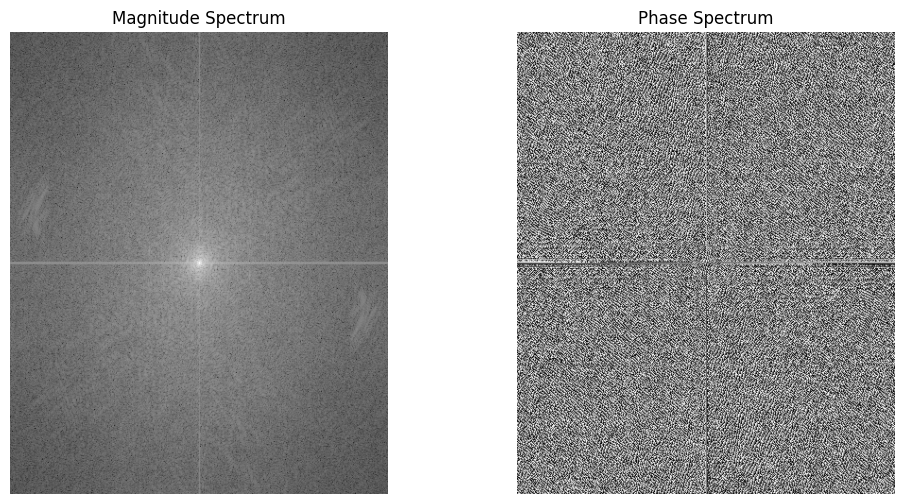

In [8]:
# Computing the 2D Fourier Transform of the greyscale image
Fourier_greyscale = np.fft.fft2(greyscale_image)
fshift = np.fft.fftshift(Fourier_greyscale)

# Calculating magnitude and phase 
magnitude = abs(fshift)
phase = np.angle(fshift)

magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1e-8)

# Plotting the magnitude and phase spectrum
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('Magnitude Spectrum')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(phase, cmap='gray')
plt.title('Phase Spectrum')
plt.axis('off')
plt.show()

## Part C
### C1. Create 3 LPF masks

Radii of filter: 10, 30, 80 (or image-size dependent, mention if you change)

For each:

1. Create a mask

2. Apply to <code>fshift</code>

3. Reconstruct using <code>ifftshift + ifft2</code>

4. Show blur levels increasing as radius decreases ( think why and write reason in code comment )

### C2. Create HPF mask

1. Apply

2. Reconstruct

### C3. Create a square LPF mask
Keep side of square as 50. The square will be at the center of the filter.
Apply, Recontruct and show the output.

In [ ]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

In [9]:
# Creating Low Pass Filter (LPF) masks
rows, cols = greyscale_image.shape
crow = rows // 2
ccol = cols // 2

LPF_mask_1= np.zeros(greyscale_image.shape, dtype=np.uint8)
R1 = 10
for i in range(rows):
    for j in range(cols):
        if (i - crow) ** 2 + (j - ccol) ** 2 <= R1 ** 2:
            LPF_mask_1[i, j] = 1


LPF_mask_2= np.zeros(greyscale_image.shape, dtype=np.uint8)
R2 = 30
for i in range(rows):
    for j in range(cols):
        if (i - crow) ** 2 + (j - ccol) ** 2 <= R2 ** 2:
            LPF_mask_2[i, j] = 1

LPF_mask_3= np.zeros(greyscale_image.shape, dtype=np.uint8)
R3 = 80
for i in range(rows):
    for j in range(cols):
        if (i - crow) ** 2 + (j - ccol) ** 2 <= R3 ** 2:
            LPF_mask_3[i, j] = 1

(-0.5, 399.5, 488.5, -0.5)

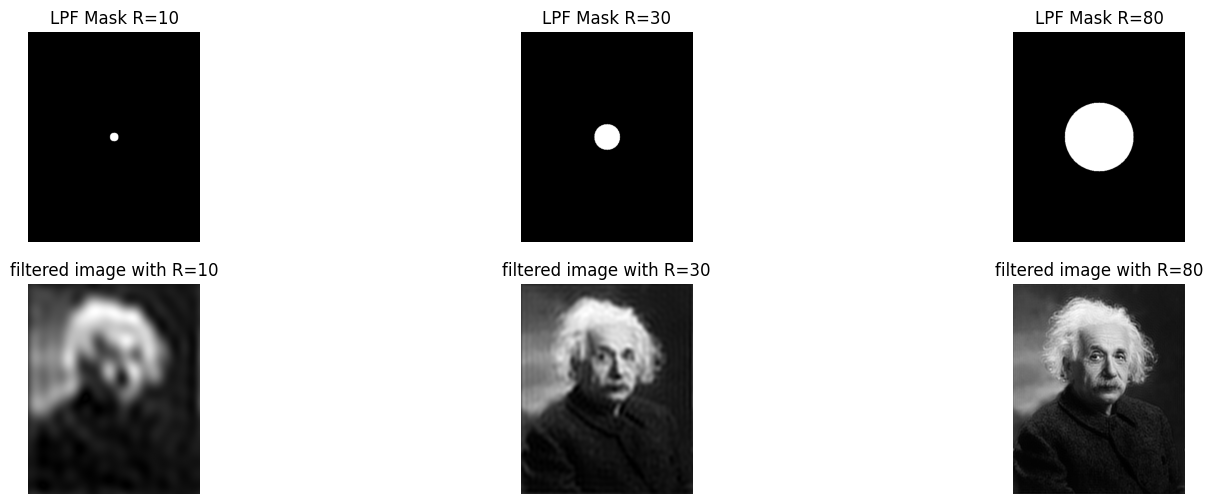

In [10]:
# Applying LPF masks and reconstructing images
filtered_fshift_1 = fshift * LPF_mask_1
filtered_fshift_2 = fshift * LPF_mask_2
filtered_fshift_3 = fshift * LPF_mask_3

filtered_ishift_1 = np.fft.ifftshift(filtered_fshift_1)
filtered_ishift_2 = np.fft.ifftshift(filtered_fshift_2)
filtered_ishift_3 = np.fft.ifftshift(filtered_fshift_3)

filtered_image_1 = np.fft.ifft2(filtered_ishift_1)
filtered_image_2 = np.fft.ifft2(filtered_ishift_2)
filtered_image_3 = np.fft.ifft2(filtered_ishift_3)

filtered_image_1 = np.abs(filtered_image_1)
filtered_image_2 = np.abs(filtered_image_2)
filtered_image_3 = np.abs(filtered_image_3)

# Plotting LPF masks and filtered images
plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.imshow(LPF_mask_1, cmap='gray')
plt.title('LPF Mask R=10')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(LPF_mask_2, cmap='gray')
plt.title('LPF Mask R=30')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(LPF_mask_3, cmap='gray')
plt.title('LPF Mask R=80')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(filtered_image_1, cmap='gray')
plt.title('filtered image with R=10')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(filtered_image_2, cmap='gray')
plt.title('filtered image with R=30')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(filtered_image_3, cmap='gray')
plt.title('filtered image with R=80')
plt.axis('off')

(-0.5, 399.5, 488.5, -0.5)

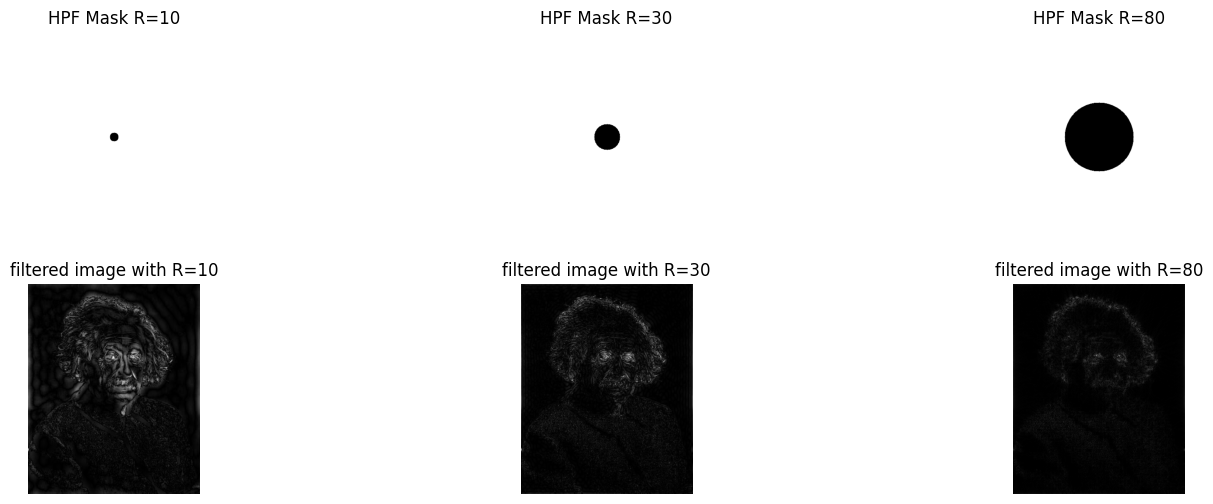

In [11]:
# Creating High Pass Filter (HPF) masks and plotting results
HPF_mask_1 = 1 - LPF_mask_1
HPF_mask_2 = 1 - LPF_mask_2
HPF_mask_3 = 1 - LPF_mask_3

HPF_filtered_fshift_1 = fshift * HPF_mask_1
HPF_filtered_fshift_2 = fshift * HPF_mask_2
HPF_filtered_fshift_3 = fshift * HPF_mask_3

HPF_filtered_ishift_1 = np.fft.ifftshift(HPF_filtered_fshift_1)
HPF_filtered_ishift_2 = np.fft.ifftshift(HPF_filtered_fshift_2)
HPF_filtered_ishift_3 = np.fft.ifftshift(HPF_filtered_fshift_3)

HPF_filtered_image_1 = np.fft.ifft2(HPF_filtered_ishift_1)
HPF_filtered_image_2 = np.fft.ifft2(HPF_filtered_ishift_2)
HPF_filtered_image_3 = np.fft.ifft2(HPF_filtered_ishift_3)

HPF_filtered_image_1 = np.abs(HPF_filtered_image_1)
HPF_filtered_image_2 = np.abs(HPF_filtered_image_2)
HPF_filtered_image_3 = np.abs(HPF_filtered_image_3)

# Plotting HPF masks and filtered images
plt.figure(figsize=(18, 6))

plt.subplot(2, 3, 1)
plt.imshow(HPF_mask_1, cmap='gray') 
plt.title('HPF Mask R=10')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(HPF_mask_2, cmap='gray')
plt.title('HPF Mask R=30')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(HPF_mask_3, cmap='gray')
plt.title('HPF Mask R=80')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(HPF_filtered_image_1, cmap='gray')
plt.title('filtered image with R=10')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(HPF_filtered_image_2, cmap='gray')
plt.title('filtered image with R=30')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(HPF_filtered_image_3, cmap='gray')
plt.title('filtered image with R=80')
plt.axis('off')

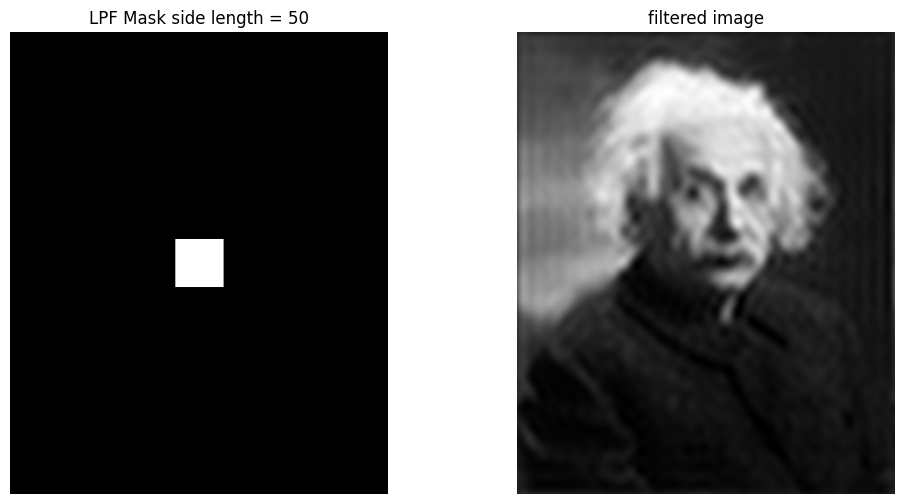

In [12]:
# Creating LPF mask with square shape of side length 50
LPF_mask_4 = np.zeros(greyscale_image.shape, dtype=np.uint8)

rows, cols = greyscale_image.shape
crow = rows // 2
ccol = cols // 2

half_side = 25

for i in range(rows):
    for j in range(cols):
        if (crow - half_side <= i <= crow + half_side) and (ccol - half_side <= j <= ccol + half_side):
            LPF_mask_4[i, j] = 1

filtered_fshift_4 = fshift * LPF_mask_4
filtered_ishift_4 = np.fft.ifftshift(filtered_fshift_4)
filtered_image_4 = np.fft.ifft2(filtered_ishift_4)
filtered_image_4 = np.abs(filtered_image_4)     

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(LPF_mask_4, cmap='gray')
plt.title('LPF Mask side length = 50')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image_4, cmap='gray')
plt.title('filtered image')
plt.axis('off')
plt.show()

## Part D

###D1. Phase-only reconstruction

Use: <code>phase_only = fshift / np.abs(fshift)</code>

1. Reconstruct and display.
2. Also in code comments, mention the differnce between this code line and the one in the lecture : <code>np.angle(f_shift)</code>
3. Try recontruction from <code>np.angle(f_shift)</code> once and explain your output in code comments.



###D2. Magnitude-only reconstruction

Use: <code>mag_only = np.abs(fshift)</code>

1. Reconstruct and display.
2. Take a guess for the role of logarithm in Magnitude Spectrum. Why does this look different than what Magnitude Spectrum looked like ? Mention in code comments again.

In [ ]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

(-0.5, 399.5, 488.5, -0.5)

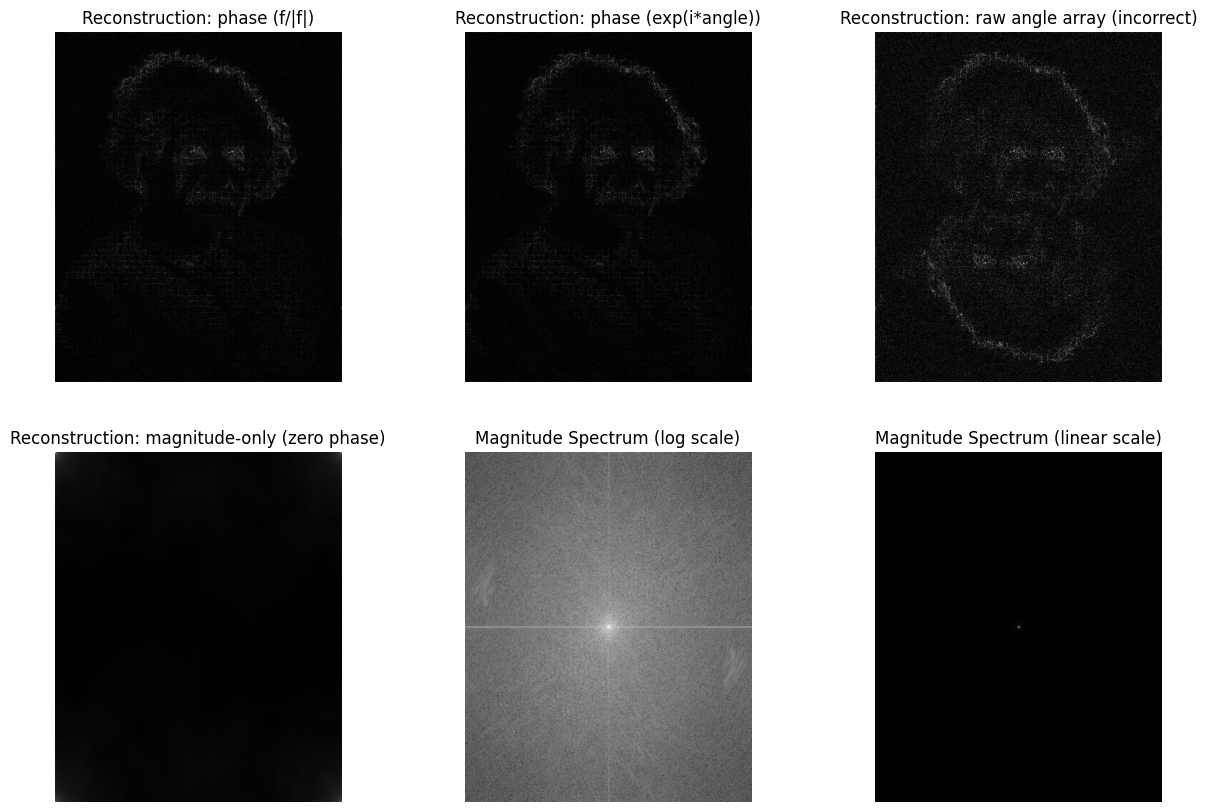

In [ ]:
# Phase-only reconstruction
phase_only = fshift / (np.abs(fshift) + 1e-12)  

recon_phase_unit = np.fft.ifft2(np.fft.ifftshift(phase_only))
recon_phase_unit = np.abs(recon_phase_unit)

angle = np.angle(fshift)
phase_from_angle = np.exp(1j * angle)  
recon_phase_exp = np.fft.ifft2(np.fft.ifftshift(phase_from_angle))
recon_phase_exp = np.abs(recon_phase_exp)

recon_phase_raw_angle = np.fft.ifft2(np.fft.ifftshift(angle))
recon_phase_raw_angle = np.abs(recon_phase_raw_angle)

# Magnitude-only reconstruction
mag_only = np.abs(fshift)

mag_complex = mag_only.astype(np.complex128)
recon_mag = np.fft.ifft2(np.fft.ifftshift(mag_complex))
recon_mag = np.abs(recon_mag)

magnitude_linear = mag_only
magnitude_log = np.log(mag_only + 1e-8)

# Plotting all results
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(recon_phase_unit, cmap='gray')
plt.title('Reconstruction: phase (f/|f|)')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(recon_phase_exp, cmap='gray')
plt.title('Reconstruction: phase (exp(i*angle))')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(recon_phase_raw_angle, cmap='gray')
plt.title('Reconstruction: raw angle array')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(recon_mag, cmap='gray')
plt.title('Reconstruction: magnitude-only (zero phase)')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(magnitude_log, cmap='gray')
plt.title('Magnitude Spectrum (log scale)')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.imshow(magnitude_linear, cmap='gray')
plt.title('Magnitude Spectrum (linear scale)')
plt.axis('off')

# D1. 3.) np.angle(fshift) gives the phase of the image in radians. 
# Thus, to reconstruct the image using only phase information,
# we can use the exponential form exp(i*angle) which represents the complex number on the unit circle corresponding to that angle. 
# This retains the phase information while keeping the magnitude constant (equal to 1).
# But if we directly use the raw angle array as the Fourier representation,it does not correspond to valid complex numbers in the Fourier domain,
# Leading to incorrect reconstruction results compared to using exp(i*angle).

# D2. 2.) The magnitude has a very large range of values. Thus, during visualization, displaying it on a linear scale can cause most details to be lost in the lower magnitude regions.
# Using a logarithmic scale compresses the range, allowing us to see both high and low magnitude details more clearly.


## Bonus - Part E

Load another image as you did before. Then swap magnitude and phase between them. In other words, for both images, find the magnitudes and phases. Combine magnitude of image 1 with phase of image 2. Also combine magnitude of 2 with phase of 1. Then reconstruct and display the resultant images.

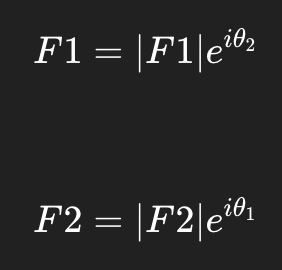

Do you notice how phase describes structure and magnitude describes texture of image ? Mention at last in code comments.


In [ ]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

/9j/4AAQSkZJRgABAQEASABIAAD/2wBDAAYEBQYFBAYGBQYHBwYIChAKCgkJChQODwwQFxQYGBcUFhYaHSUfGhsjHBYWICwgIyYnKSopGR8tMC0oMCUoKSj/2wBDAQcHBwoIChMKChMoGhYaKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCj/wgARCAHpAZADASIAAhEBAxEB/8QAGwAAAgMBAQEAAAAAAAAAAAAAAQIAAwQFBgf/xAAZAQEBAQEBAQAAAAAAAAAAAAAAAQIDBAX/2gAMAwEAAhADEAAAAfHgz2+KLZLK1sWVA0lVXWUBgCGAIJA4AZBSYAwDRbLESxJUVkzoCDOpIAuj2CtklkklgkiSQhEDAVkkl65J9fkDE2VpcJaBastYYypLVKlsSUMHli3jUoO6RkGwWZJbCo2Vioy50iWJnSK6SySSwgEUyUSAkkiSQkkJCKkkO5DPV5YYbIGFKtglqNjRWmlbMdeqrn0TQu2VfR9Ddx61VdrTz35/k+5Gp8zzfR+dvHiavoefU+ar6DhmWu+GddVJUtiSiSSrCIWELIQQESmSISpoSQ7ph9flhkskihNbQxDWXKy6zUW2ce1foX2eX02dJt2NWOzy1rfSortCYh0BXK857ao+Y5PqPOs+fU/QOhrPx/L7jyG84w0FBgsZZQDASSARAyQkkPQEN7fIIxsrW2RQ7xSXOsravZxuno6uj4/Vk7bXc96Lsl8tyiosSph4oLGpIarAVjQ5np6Gc8N4r6v5rWfBJ1cHXGdYtkWDOhCCSSBCFMESSRfSGH3eENGsrYuVywVDHjRdXZw79DuYOp5fRq1Z3zu+yjTEqGcssyPWuqsRe2cLrGUrrTMJdi03XKYejms+Uc/6P5Szyi9HnbwoIqSSICAgRYRCSQ9SWP0PniNKVmiLLhZU5szpulXt8frbt17fP3dqUXQ/LsTdhr4s13F42nl6

(-0.5, 399.5, 488.5, -0.5)

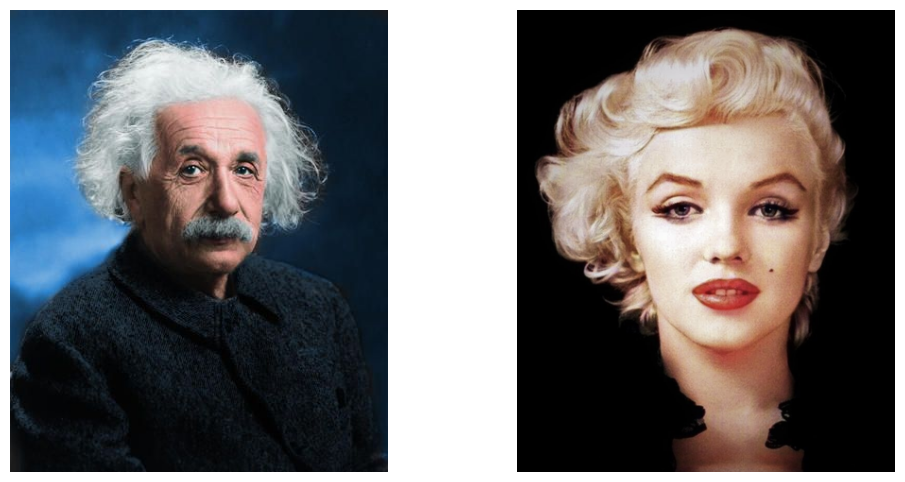

In [ ]:
# Loading two images and encoding them to base64

with open("einstein.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
    print(encoded_string.decode())

img_data = base64.b64decode(encoded_string)
image_1 = Image.open(io.BytesIO(img_data))
image_1_array = np.array(image_1)

with open("merlin.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
    print(encoded_string.decode())

img_data = base64.b64decode(encoded_string)
image_2 = Image.open(io.BytesIO(img_data))

new_width, new_height = image_1.size
image_2 = image_2.resize((new_width, new_height))
image_2_array = np.array(image_2)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(image_1)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_2)
plt.axis('off')

We can observe that the images reconstructed using phase information from another image resemble the original images more closely than those reconstructed using magnitude information from another image.
The magnitude seems to contribute more to the overall brightness and contrast. Thus, the magnitude is responsible for textures and fine details, while the phase carries essential structural information about the image.


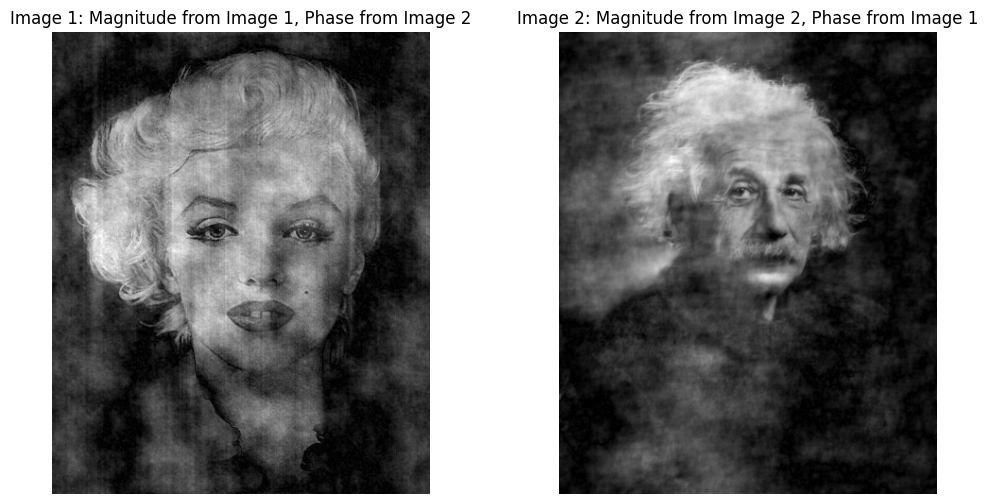

In [ ]:
# Converting both images to greyscale
greyscale_image_1 = np.zeros((image_1.size[1], image_1.size[0]), dtype=np.float32)
for i in range(image_1.size[1]):
    for j in range(image_1.size[0]):
        r, g, b = image_1_array[i, j]
        greyscale_image_1[i, j] = 0.299 * r + 0.587 * g + 0.114 * b

greyscale_image_2 = np.zeros((image_2.size[1], image_2.size[0]), dtype=np.float32)
for i in range(image_2.size[1]):
    for j in range(image_2.size[0]):
        r, g, b = image_2_array[i, j]
        greyscale_image_2[i, j] = 0.299 * r + 0.587 * g + 0.114 * b

# Computing Fourier Transforms, magnitudes and phases
fourier_1 = np.fft.fft2(greyscale_image_1)
fourier_2 = np.fft.fft2(greyscale_image_2)

fshift_1 = np.fft.fftshift(fourier_1)
fshift_2 = np.fft.fftshift(fourier_2)

magnitude_1 = np.abs(fshift_1)
magnitude_2 = np.abs(fshift_2)

phase_1 = fshift_1 / magnitude_1
phase_2 = fshift_2 / magnitude_2

# Swapping magnitude and phase information
new_fourier_1 = magnitude_1 * phase_2
new_fshift_1 = np.fft.fftshift(new_fourier_1)
new_ishift_1 = np.fft.ifftshift(new_fshift_1)
new_image_1 = np.fft.ifft2(new_ishift_1)
new_image_1 = np.abs(new_image_1)

new_fourier_2 = magnitude_2 * phase_1
new_fshift_2 = np.fft.fftshift(new_fourier_2)
new_ishift_2 = np.fft.ifftshift(new_fshift_2)
new_image_2 = np.fft.ifft2(new_ishift_2)
new_image_2 = np.abs(new_image_2)

# Plotting the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(new_image_1, cmap='gray')
plt.axis('off')
plt.title('Image 1: Magnitude from Image 1, Phase from Image 2')

plt.subplot(1, 2, 2)
plt.imshow(new_image_2, cmap='gray')
plt.axis('off')
plt.title('Image 2: Magnitude from Image 2, Phase from Image 1')

print("We can observe that the images reconstructed using phase information from another image resemble the original images more closely than those reconstructed using magnitude information from another image.")
print("The magnitude seems to contribute more to the overall brightness and contrast. Thus, the magnitude is responsible for textures and fine details, while the phase carries essential structural information about the image.")